In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import skimage.io as io
from skimage import data
%matplotlib inline
#matplotlib.use('TkAgg')
import pathlib as Path
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [2]:
io.show()

In [3]:
coins = data.coins()

([array([66., 16., 12., 54., 39., 21., 16.,  8., 12., 11.]),
  array([127., 126.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([   0. ,  126.4,  252.8,  379.2,  505.6,  632. ,  758.4,  884.8,
        1011.2, 1137.6, 1264. ]),
 <a list of 2 Lists of Patches objects>)

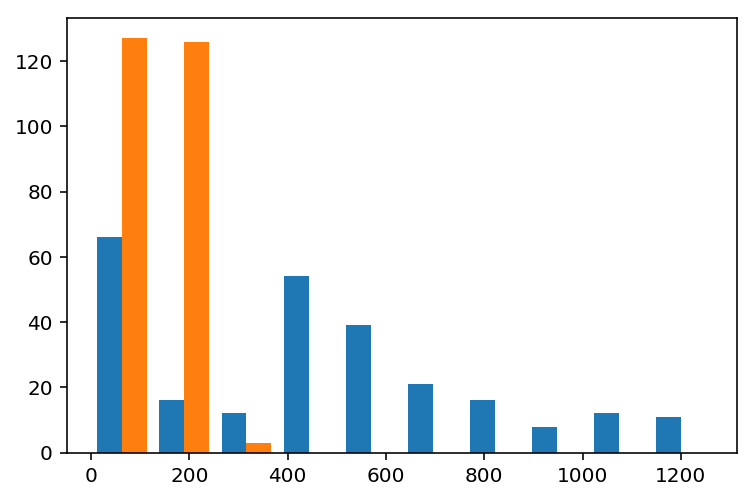

In [4]:
histo = np.histogram(coins,bins=np.arange(0,256))
plt.hist(histo)

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Grayscale')

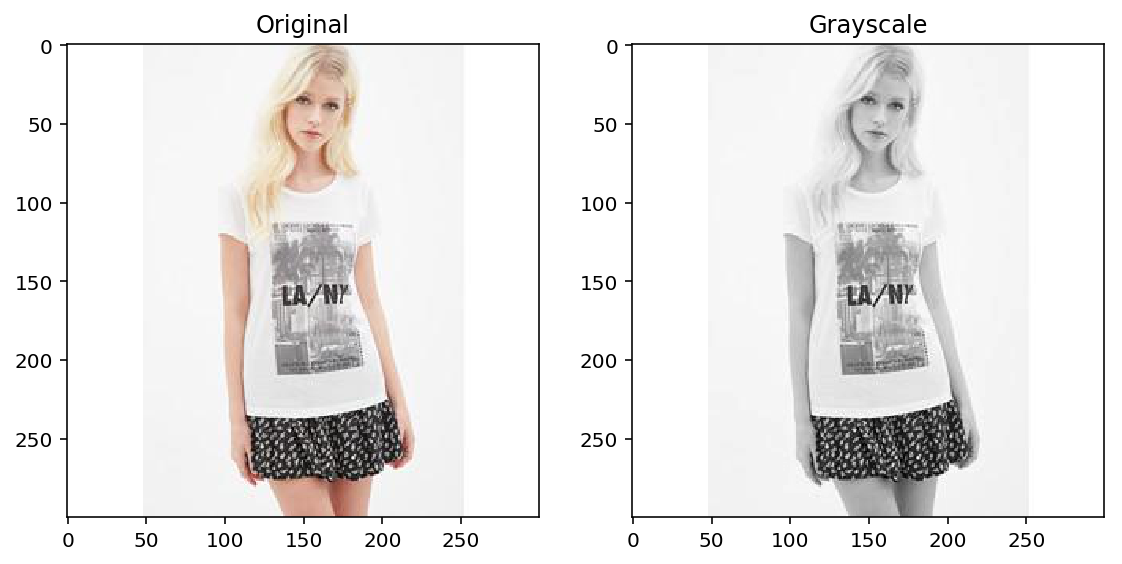

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

testPicPath = Path.Path('../data/Img/1981_Graphic_Ringer_Tee/img_00000005.jpg')
testPic = io.imread(testPicPath)

#original = data.astronaut()
original = testPic
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()
plt.close()

In [7]:
modelPath = Path.Path("../model/model_DeepF_20181226.h5")
imagesPath = Path.Path('../data/Img/1981_Graphic_Ringer_Tee/img_00000005.jpg')



In [9]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.utils import plot_model
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import random
import cv2

In [8]:
model = load_model(str(modelPath))

In [14]:
plot_model(model,to_file='./model_DeepF_20181226_plot.png', show_shapes=True)

In [52]:
orig = cv2.imread(str(imagesPath))

In [53]:
image = cv2.cvtColor(orig,cv2.COLOR_BGR2RGB)

In [54]:
#image = cv2.resize(image,(200,200))
image.shape

(300, 300, 3)

In [55]:
image = image.astype("float")/255.0

In [56]:
image = img_to_array(image)

In [57]:
image = np.expand_dims(image,axis = 0)

In [58]:
pred = model.predict(image)

In [19]:
#dir(model)

In [59]:
pred[0].shape

(1, 46)

In [60]:
pred[0].shape
pred

(1, 46)

[array([[0.00284135, 0.04607412, 0.0974905 , 0.00110588, 0.0038799 ,
         0.00933042, 0.00383928, 0.04657606, 0.00602346, 0.00964427,
         0.00186134, 0.01386983, 0.00357096, 0.17727025, 0.00342092,
         0.00800709, 0.00251435, 0.00563971, 0.00841701, 0.00463798,
         0.01387793, 0.00542119, 0.00381657, 0.00272644, 0.02713231,
         0.03492567, 0.01563675, 0.01931485, 0.01267005, 0.0009462 ,
         0.00097523, 0.0010637 , 0.00073952, 0.00916152, 0.03069308,
         0.00289546, 0.0284864 , 0.03002056, 0.01071599, 0.04464858,
         0.01153927, 0.08996653, 0.10344718, 0.03208707, 0.00212612,
         0.00895115]], dtype=float32),
 array([[0.18767923, 0.2267403 , 0.7147112 , 0.68581325]], dtype=float32)]

In [61]:
import json
with open('./dict_test.json','r') as f:
    dict_test = json.load(f)
classes = list(set([k.split('/')[0] for k in dict_test.keys()]))

In [64]:
classes = np.array(sorted(classes))
classes

array(['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan',
       'Capris', 'Cardigan', 'Chinos', 'Coat', 'Coverup', 'Culottes',
       'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter', 'Henley',
       'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs',
       'Joggers', 'Jumpsuit', 'Kaftan', 'Kimono', 'Leggings', 'Onesie',
       'Parka', 'Peacoat', 'Poncho', 'Robe', 'Romper', 'Sarong', 'Shorts',
       'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee',
       'Top', 'Trunks', 'Turtleneck'], dtype='<U11')

In [65]:
h,w,_ = orig.shape
pred[0].argmax()
classes[pred[0].argmax()]

x1,y1,x2,y2= pred[1].tolist()[0]
x1 = int(x1 * w)
x2 = int(x2 * w)
y1 = int(y1 * h)
y2 = int(y2 * h)
print("bbox coordinates:",x1,y1,x2,y2,h,w)


13

'Dress'

bbox coordinates: 56 68 214 205 300 300


In [66]:
orig = cv2.cvtColor(orig,cv2.COLOR_BGR2RGB)
imgaug =cv2.rectangle(orig,(x1,y1),(x2,y2),(0,255,0),2)

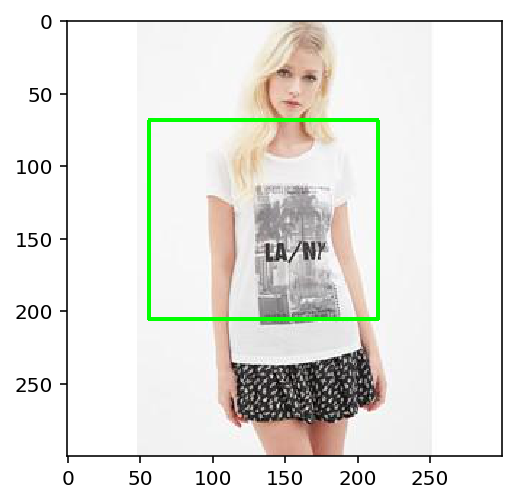

In [67]:
plt.imshow(imgaug)

In [26]:
pred[1]

array([[0.17189848, 0.16830081, 0.64545226, 0.65321624]], dtype=float32)

In [69]:
def custom_generator(iterator):    
    while True:
        batch_x, batch_y = iterator.next()        
        yield (batch_x, batch_y)

In [71]:
from DeepF_Step2Train import ImageDataGenerator,DirectoryIteratorWithBoundingBoxes,create_dict_bboxes


test_datagen = ImageDataGenerator()

test_iterator = DirectoryIteratorWithBoundingBoxes("/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/data/test", 
                                                   test_datagen, bounding_boxes=dict_test, target_size=(200, 200))
scores = model.evaluate_generator(custom_generator(test_iterator), steps=2000)

print('Multi target loss: ' + str(scores[0]))
print('Image loss: ' + str(scores[1]))
print('Bounding boxes loss: ' + str(scores[2]))
print('Image accuracy: ' + str(scores[3]))
print('Top-5 image accuracy: ' + str(scores[4]))
print('Bounding boxes error: ' + str(scores[5]))

Found 40000 images belonging to 46 classes.
Multi target loss: 2.6042174615263938
Image loss: 1.6711565986275674
Bounding boxes loss: 0.017893143161199988
Image accuracy: 0.52496875
Top-5 image accuracy: 0.85465625
Bounding boxes error: 0.017893143161199988


data/    model/   predict/ view/


In [32]:
import pickle